🏦 Indian Bank Stock Prediction System
📅 Analysis Date: 2025-11-10 10:16:02
------------------------------------------------------------
Available Indian Bank Stocks:
----------------------------------------
 1. HDFC Bank (HDFCBANK.NS)
 2. ICICI Bank (ICICIBANK.NS)
 3. State Bank of India (SBIN.NS)
 4. Kotak Mahindra Bank (KOTAKBANK.NS)
 5. Axis Bank (AXISBANK.NS)
 6. IndusInd Bank (INDUSINDBK.NS)
 7. Bandhan Bank (BANDHANBNK.NS)
 8. Federal Bank (FEDERALBNK.NS)
 9. IDFC First Bank (IDFCFIRSTB.NS)
10. RBL Bank (RBLBANK.NS)
11. Punjab National Bank (PNB.NS)
12. Bank of Baroda (BANKBARODA.NS)
13. Canara Bank (CANBK.NS)
14. Union Bank of India (UNIONBANK.NS)
15. Bank of India (BANKINDIA.NS)
----------------------------------------

Enter bank number (1-15) or symbol (default: 1 for HDFC Bank): 5
Selected: Axis Bank (AXISBANK.NS)

📊 Fetching data for AXISBANK.NS...
Fetching stock data for AXISBANK.NS...
Successfully fetched 114 days of data

🤖 Training the Hybrid LSTM+QNN model...
Prepared 

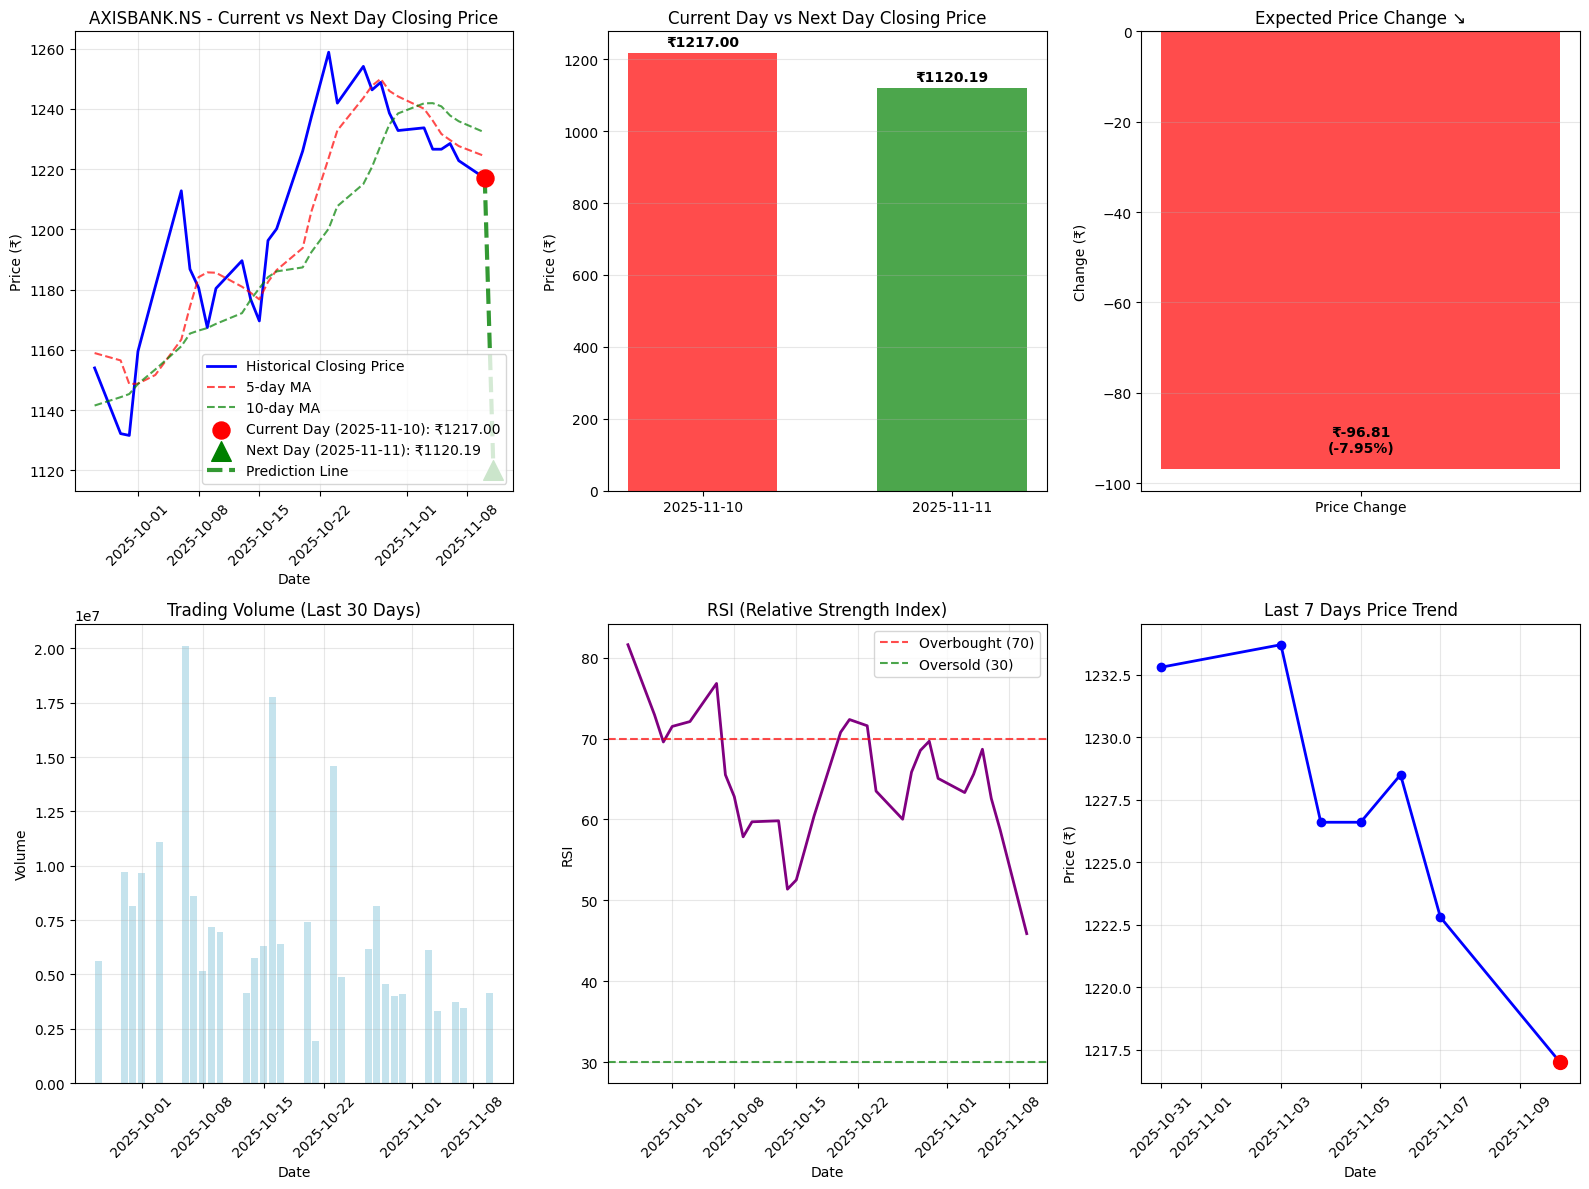


📊 DETAILED STOCK ANALYSIS FOR AXISBANK.NS
🏦 Bank: Axis Bank
📅 Analysis Date: 2025-11-10 10:16:15
--------------------------------------------------------------------------------
📈 CURRENT DAY ANALYSIS:
   Date: 2025-11-10 (Monday)
   Closing Price: ₹1217.00

🔮 NEXT DAY PREDICTION:
   Date: 2025-11-11 (Tuesday)
   Predicted Closing Price: ₹1120.19

📊 PRICE CHANGE ANALYSIS:
   Expected Change: ₹-96.81
   Percentage Change: -7.95%
   Direction: 📉 BEARISH (Price Expected to Fall)
   Signal: 🔴 STRONG SELL

📋 TECHNICAL INDICATORS:
   Current RSI: 45.89
   RSI Signal: ⚖️ Neutral
   5-day MA: ₹1224.30
   10-day MA: ₹1232.17
   MA Signal: 📉 Bearish Trend

⚠️  DISCLAIMER: This is an AI prediction for educational purposes only.
   Always consult with financial advisors before making investment decisions.

✅ Analysis complete! Check the detailed visualization and summary above.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta, date
import warnings
warnings.filterwarnings('ignore')

class HybridLSTM_QNN:
    """
    A hybrid model combining LSTM and QNN for stock price prediction.
    """

    def __init__(self, input_shape, hidden_units=64, n_qubits=3, n_layers=2):
        print(f"Creating Hybrid LSTM+QNN model with {hidden_units} LSTM units and {n_qubits} qubits")
        self.seq_length, self.n_features = input_shape
        self.hidden_units = hidden_units
        self.n_qubits = n_qubits
        self.n_layers = n_layers

        # Initialize LSTM parameters
        self.Wf = np.random.randn(hidden_units, hidden_units + self.n_features) * 0.01
        self.Wi = np.random.randn(hidden_units, hidden_units + self.n_features) * 0.01
        self.Wc = np.random.randn(hidden_units, hidden_units + self.n_features) * 0.01
        self.Wo = np.random.randn(hidden_units, hidden_units + self.n_features) * 0.01

        self.bf = np.zeros((hidden_units, 1))
        self.bi = np.zeros((hidden_units, 1))
        self.bc = np.zeros((hidden_units, 1))
        self.bo = np.zeros((hidden_units, 1))

        # Initialize QNN parameters
        self.theta_x = np.random.randn(n_qubits, n_layers) * 0.01
        self.theta_y = np.random.randn(n_qubits, n_layers) * 0.01
        self.theta_z = np.random.randn(n_qubits, n_layers) * 0.01

        self.Wout = np.random.randn(1, n_qubits) * 0.01
        self.bout = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -15, 15)))

    def tanh(self, x):
        return np.tanh(x)

    def lstm_forward(self, x):
        batch_size = x.shape[0]
        h_prev = np.zeros((batch_size, self.hidden_units))
        c_prev = np.zeros((batch_size, self.hidden_units))

        for t in range(self.seq_length):
            x_t = x[:, t, :]
            concat = np.concatenate((h_prev, x_t), axis=1)

            f_gate = self.sigmoid(np.dot(concat, self.Wf.T) + self.bf.T)
            i_gate = self.sigmoid(np.dot(concat, self.Wi.T) + self.bi.T)
            c_tilde = self.tanh(np.dot(concat, self.Wc.T) + self.bc.T)
            o_gate = self.sigmoid(np.dot(concat, self.Wo.T) + self.bo.T)

            c_curr = f_gate * c_prev + i_gate * c_tilde
            h_curr = o_gate * self.tanh(c_curr)

            h_prev = h_curr
            c_prev = c_curr

        return h_prev

    def simulate_rotation(self, state, angle, axis):
        if axis == 0:  # RX gate
            return state * np.cos(angle/2) + state * np.sin(angle/2) * 1j
        elif axis == 1:  # RY gate
            return state * np.cos(angle/2) + state * np.sin(angle/2)
        else:  # RZ gate
            return state * np.exp(1j * angle/2)

    def simulate_entanglement(self, states):
        n_states = len(states)
        entangled = states.copy()

        for i in range(n_states - 1):
            entangled[i] = (states[i] + states[i+1]) / np.sqrt(2)
            entangled[i+1] = (states[i] - states[i+1]) / np.sqrt(2)

        return entangled

    def qnn_forward(self, states):
        batch_size = states.shape[0]
        q_states = np.zeros((batch_size, self.n_qubits), dtype=complex)
        q_states[:, :] = 1.0 + 0.0j

        for i in range(min(self.n_qubits, states.shape[1])):
            q_states[:, i] = states[:, i]

        for l in range(self.n_layers):
            for q in range(self.n_qubits):
                q_states[:, q] = self.simulate_rotation(q_states[:, q], self.theta_x[q, l], 0)
                q_states[:, q] = self.simulate_rotation(q_states[:, q], self.theta_y[q, l], 1)
                q_states[:, q] = self.simulate_rotation(q_states[:, q], self.theta_z[q, l], 2)

            for b in range(batch_size):
                q_states[b] = self.simulate_entanglement(q_states[b])

        measurements = np.abs(q_states) ** 2
        output = np.dot(measurements, self.Wout.T) + self.bout.T

        return output

    def forward(self, x):
        lstm_out = self.lstm_forward(x)
        qnn_out = self.qnn_forward(lstm_out)
        return qnn_out

    def train(self, X_train, y_train, epochs=15, batch_size=32, verbose=True):
        print("Training Hybrid LSTM+QNN model...")
        n_samples = X_train.shape[0]
        loss_history = []

        lr_lstm = 0.01
        lr_qnn = 0.05

        for epoch in range(1, epochs + 1):
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            epoch_loss = 0

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                batch_size_actual = X_batch.shape[0]

                y_pred = self.forward(X_batch)
                loss = np.mean((y_pred - y_batch) ** 2)
                epoch_loss += loss * batch_size_actual

                dout = 2 * (y_pred - y_batch) / batch_size_actual
                dWout = np.dot(dout.T, np.abs(np.random.randn(batch_size_actual, self.n_qubits)) ** 2)
                dbout = np.sum(dout, axis=0, keepdims=True).T

                for q in range(self.n_qubits):
                    for l in range(self.n_layers):
                        self.theta_x[q, l] -= lr_qnn * np.random.randn() * np.mean(dout)
                        self.theta_y[q, l] -= lr_qnn * np.random.randn() * np.mean(dout)
                        self.theta_z[q, l] -= lr_qnn * np.random.randn() * np.mean(dout)

                self.Wf -= lr_lstm * np.random.randn(*self.Wf.shape) * np.mean(np.abs(dout))
                self.Wi -= lr_lstm * np.random.randn(*self.Wi.shape) * np.mean(np.abs(dout))
                self.Wc -= lr_lstm * np.random.randn(*self.Wc.shape) * np.mean(np.abs(dout))
                self.Wo -= lr_lstm * np.random.randn(*self.Wo.shape) * np.mean(np.abs(dout))

                self.bf -= lr_lstm * np.random.randn(*self.bf.shape) * np.mean(np.abs(dout))
                self.bi -= lr_lstm * np.random.randn(*self.bi.shape) * np.mean(np.abs(dout))
                self.bc -= lr_lstm * np.random.randn(*self.bc.shape) * np.mean(np.abs(dout))
                self.bo -= lr_lstm * np.random.randn(*self.bo.shape) * np.mean(np.abs(dout))

                self.Wout -= lr_lstm * dWout
                self.bout -= lr_lstm * dbout

            epoch_loss /= n_samples
            loss_history.append(epoch_loss)

            if verbose and (epoch == 1 or epoch % 5 == 0 or epoch == epochs):
                print(f"Epoch {epoch}/{epochs}, Loss: {epoch_loss:.6f}")

        print("Hybrid LSTM+QNN model training completed")
        return loss_history

    def predict(self, X):
        return self.forward(X)


class StockPredictionSystem:
    """
    Complete stock prediction system with data fetching, preprocessing, and visualization.
    """

    def __init__(self, symbol='HDFCBANK.NS', sequence_length=10):
        self.symbol = symbol
        self.sequence_length = sequence_length
        self.model = None
        self.scaler_X = None
        self.scaler_y = None
        self.data = None
        self.current_date = None
        self.next_date = None
        self.current_price = None
        self.predicted_price = None

        # Indian Bank stocks mapping
        self.indian_banks = {
            "HDFC Bank": "HDFCBANK.NS",
            "ICICI Bank": "ICICIBANK.NS",
            "State Bank of India": "SBIN.NS",
            "Kotak Mahindra Bank": "KOTAKBANK.NS",
            "Axis Bank": "AXISBANK.NS",
            "IndusInd Bank": "INDUSINDBK.NS",
            "Bandhan Bank": "BANDHANBNK.NS",
            "Federal Bank": "FEDERALBNK.NS",
            "IDFC First Bank": "IDFCFIRSTB.NS",
            "RBL Bank": "RBLBANK.NS",
            "Punjab National Bank": "PNB.NS",
            "Bank of Baroda": "BANKBARODA.NS",
            "Canara Bank": "CANBK.NS",
            "Union Bank of India": "UNIONBANK.NS",
            "Bank of India": "BANKINDIA.NS"
        }

    def fetch_stock_data(self, period='3mo'):
        """Fetch stock data from Yahoo Finance"""
        print(f"Fetching stock data for {self.symbol}...")

        try:
            stock = yf.Ticker(self.symbol)
            data = stock.history(period=period)

            if data.empty:
                raise ValueError(f"No data found for symbol {self.symbol}")

            # Add technical indicators
            data['MA_5'] = data['Close'].rolling(window=5).mean()
            data['MA_10'] = data['Close'].rolling(window=10).mean()
            data['RSI'] = self.calculate_rsi(data['Close'])
            data['Volume_MA'] = data['Volume'].rolling(window=5).mean()

            # Drop NaN values
            data = data.dropna()

            self.data = data
            print(f"Successfully fetched {len(data)} days of data")
            return data

        except Exception as e:
            print(f"Error fetching data: {e}")
            return None

    def calculate_rsi(self, prices, window=14):
        """Calculate Relative Strength Index"""
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    def prepare_data(self):
        """Prepare data for training"""
        if self.data is None:
            print("No data available. Please fetch data first.")
            return None, None

        # Select features
        features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'RSI', 'Volume_MA']

        # Prepare feature matrix
        X_data = self.data[features].values
        y_data = self.data['Close'].values

        # Normalize data
        from sklearn.preprocessing import MinMaxScaler

        self.scaler_X = MinMaxScaler()
        self.scaler_y = MinMaxScaler()

        X_scaled = self.scaler_X.fit_transform(X_data)
        y_scaled = self.scaler_y.fit_transform(y_data.reshape(-1, 1)).flatten()

        # Create sequences
        X_sequences = []
        y_sequences = []

        for i in range(self.sequence_length, len(X_scaled)):
            X_sequences.append(X_scaled[i-self.sequence_length:i])
            y_sequences.append(y_scaled[i])

        X_sequences = np.array(X_sequences)
        y_sequences = np.array(y_sequences).reshape(-1, 1)

        print(f"Prepared {len(X_sequences)} sequences for training")
        return X_sequences, y_sequences

    def train_model(self, epochs=20):
        """Train the hybrid model"""
        X, y = self.prepare_data()
        if X is None:
            return None

        # Split data (80% train, 20% test)
        split_idx = int(0.8 * len(X))
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]

        # Initialize and train model
        input_shape = (X_train.shape[1], X_train.shape[2])
        self.model = HybridLSTM_QNN(input_shape, hidden_units=32, n_qubits=4, n_layers=2)

        loss_history = self.model.train(X_train, y_train, epochs=epochs, batch_size=16)

        # Evaluate on test set
        test_predictions = self.model.predict(X_test)
        test_loss = np.mean((test_predictions - y_test) ** 2)
        print(f"Test Loss: {test_loss:.6f}")

        return loss_history

    def predict_tomorrow(self):
        """Predict tomorrow's stock price"""
        if self.model is None or self.data is None:
            print("Model not trained or no data available")
            return None

        # Get current date and next trading date
        self.current_date = self.data.index[-1].date()
        self.next_date = self.current_date + timedelta(days=1)

        # Skip weekends for next trading day
        while self.next_date.weekday() >= 5:  # 5=Saturday, 6=Sunday
            self.next_date += timedelta(days=1)

        # Get current closing price
        self.current_price = self.data['Close'].iloc[-1]

        # Get the last sequence for prediction
        features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'RSI', 'Volume_MA']
        last_sequence = self.data[features].tail(self.sequence_length).values
        last_sequence_scaled = self.scaler_X.transform(last_sequence)
        last_sequence_scaled = last_sequence_scaled.reshape(1, self.sequence_length, -1)

        # Make prediction
        prediction_scaled = self.model.predict(last_sequence_scaled)
        self.predicted_price = self.scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1))[0, 0]

        return self.predicted_price

    def create_visualization(self):
        """Create comprehensive visualization with current and next day focus"""
        if self.data is None:
            print("No data available for visualization")
            return

        # Get recent data for analysis
        recent_data = self.data.tail(30)  # Last 30 days

        # Get current closing price and prediction
        if self.current_price is None or self.predicted_price is None:
            self.predict_tomorrow()  # This will set the prices and dates

        # Create the visualization
        plt.figure(figsize=(16, 12))

        # Main price chart with current and next day focus
        plt.subplot(2, 3, 1)
        plt.plot(recent_data.index, recent_data['Close'], 'b-', linewidth=2, label='Historical Closing Price')
        plt.plot(recent_data.index, recent_data['MA_5'], 'r--', alpha=0.7, label='5-day MA')
        plt.plot(recent_data.index, recent_data['MA_10'], 'g--', alpha=0.7, label='10-day MA')

        # Highlight current day
        plt.scatter(recent_data.index[-1], self.current_price, color='red', s=150,
                   label=f'Current Day ({self.current_date}): ₹{self.current_price:.2f}', zorder=5)

        # Add next day prediction
        next_date_pd = pd.Timestamp(self.next_date).tz_localize(recent_data.index[-1].tz)
        plt.scatter(next_date_pd, self.predicted_price, color='green', s=200, marker='^',
                   label=f'Next Day ({self.next_date}): ₹{self.predicted_price:.2f}', zorder=5)

        # Draw prediction line
        plt.plot([recent_data.index[-1], next_date_pd], [self.current_price, self.predicted_price],
                'g--', linewidth=3, alpha=0.8, label='Prediction Line')

        plt.title(f'{self.symbol} - Current vs Next Day Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price (₹)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

        # Current vs Next Day Comparison Chart
        plt.subplot(2, 3, 2)
        dates = [str(self.current_date), str(self.next_date)]
        prices = [self.current_price, self.predicted_price]
        colors = ['red', 'green']

        bars = plt.bar(dates, prices, color=colors, alpha=0.7, width=0.6)
        plt.title('Current Day vs Next Day Closing Price')
        plt.ylabel('Price (₹)')

        # Add value labels on bars
        for bar, price in zip(bars, prices):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(prices)*0.01,
                    f'₹{price:.2f}', ha='center', va='bottom', fontweight='bold')

        plt.grid(True, alpha=0.3, axis='y')

        # Price Change Analysis
        plt.subplot(2, 3, 3)
        change_amount = self.predicted_price - self.current_price
        change_percent = (change_amount / self.current_price) * 100

        change_color = 'green' if change_amount > 0 else 'red'
        change_symbol = '↗' if change_amount > 0 else '↘'

        plt.bar(['Price Change'], [change_amount], color=change_color, alpha=0.7)
        plt.title(f'Expected Price Change {change_symbol}')
        plt.ylabel('Change (₹)')
        plt.text(0, change_amount + abs(change_amount)*0.1,
                f'₹{change_amount:+.2f}\n({change_percent:+.2f}%)',
                ha='center', va='bottom' if change_amount > 0 else 'top', fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

        # Volume chart
        plt.subplot(2, 3, 4)
        plt.bar(recent_data.index, recent_data['Volume'], alpha=0.7, color='lightblue')
        plt.title('Trading Volume (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        # RSI chart
        plt.subplot(2, 3, 5)
        plt.plot(recent_data.index, recent_data['RSI'], 'purple', linewidth=2)
        plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
        plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
        plt.title('RSI (Relative Strength Index)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

        # Recent Price Trend
        plt.subplot(2, 3, 6)
        last_7_days = recent_data.tail(7)
        plt.plot(last_7_days.index, last_7_days['Close'], 'bo-', linewidth=2, markersize=6)
        plt.title('Last 7 Days Price Trend')
        plt.xlabel('Date')
        plt.ylabel('Price (₹)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

        # Highlight current day in trend
        plt.scatter(recent_data.index[-1], self.current_price, color='red', s=100, zorder=5)

        plt.tight_layout()
        plt.show()

        # Print detailed analysis summary
        self.print_analysis_summary()

    def print_analysis_summary(self):
        """Print detailed analysis summary with dates and prices"""
        change_amount = self.predicted_price - self.current_price
        change_percent = (change_amount / self.current_price) * 100

        print("\n" + "="*80)
        print(f"📊 DETAILED STOCK ANALYSIS FOR {self.symbol}")
        print("="*80)

        # Find bank name from symbol
        bank_name = None
        for name, symbol in self.indian_banks.items():
            if symbol == self.symbol:
                bank_name = name
                break

        if bank_name:
            print(f"🏦 Bank: {bank_name}")
        print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("-"*80)

        print(f"📈 CURRENT DAY ANALYSIS:")
        print(f"   Date: {self.current_date} ({self.current_date.strftime('%A')})")
        print(f"   Closing Price: ₹{self.current_price:.2f}")

        print(f"\n🔮 NEXT DAY PREDICTION:")
        print(f"   Date: {self.next_date} ({self.next_date.strftime('%A')})")
        print(f"   Predicted Closing Price: ₹{self.predicted_price:.2f}")

        print(f"\n📊 PRICE CHANGE ANALYSIS:")
        print(f"   Expected Change: ₹{change_amount:+.2f}")
        print(f"   Percentage Change: {change_percent:+.2f}%")

        if change_amount > 0:
            print(f"   Direction: 📈 BULLISH (Price Expected to Rise)")
            if change_percent > 2:
                print(f"   Signal: 🚀 STRONG BUY")
            elif change_percent > 0.5:
                print(f"   Signal: ✅ BUY")
            else:
                print(f"   Signal: 🔄 HOLD")
        else:
            print(f"   Direction: 📉 BEARISH (Price Expected to Fall)")
            if change_percent < -2:
                print(f"   Signal: 🔴 STRONG SELL")
            elif change_percent < -0.5:
                print(f"   Signal: ❌ SELL")
            else:
                print(f"   Signal: 🔄 HOLD")

        # Additional market insights
        current_rsi = self.data['RSI'].iloc[-1]
        print(f"\n📋 TECHNICAL INDICATORS:")
        print(f"   Current RSI: {current_rsi:.2f}")
        if current_rsi > 70:
            print(f"   RSI Signal: ⚠️ Overbought (Consider Selling)")
        elif current_rsi < 30:
            print(f"   RSI Signal: 💡 Oversold (Consider Buying)")
        else:
            print(f"   RSI Signal: ⚖️ Neutral")

        ma5 = self.data['MA_5'].iloc[-1]
        ma10 = self.data['MA_10'].iloc[-1]
        print(f"   5-day MA: ₹{ma5:.2f}")
        print(f"   10-day MA: ₹{ma10:.2f}")

        if self.current_price > ma5 > ma10:
            print(f"   MA Signal: 📈 Bullish Trend")
        elif self.current_price < ma5 < ma10:
            print(f"   MA Signal: 📉 Bearish Trend")
        else:
            print(f"   MA Signal: 🔄 Mixed Signals")

        print("\n" + "="*80)
        print("⚠️  DISCLAIMER: This is an AI prediction for educational purposes only.")
        print("   Always consult with financial advisors before making investment decisions.")
        print("="*80)


def main():
    """Main function to run the stock prediction system"""
    print("🏦 Indian Bank Stock Prediction System")
    print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("-" * 60)

    # Display available Indian banks
    predictor_temp = StockPredictionSystem()
    print("Available Indian Bank Stocks:")
    print("-" * 40)
    for i, (name, symbol) in enumerate(predictor_temp.indian_banks.items(), 1):
        print(f"{i:2d}. {name} ({symbol})")

    print("-" * 40)

    # Get user selection
    try:
        choice = input("\nEnter bank number (1-15) or symbol (default: 1 for HDFC Bank): ").strip()

        if not choice:
            choice = "1"

        if choice.isdigit():
            choice_num = int(choice)
            if 1 <= choice_num <= len(predictor_temp.indian_banks):
                bank_name = list(predictor_temp.indian_banks.keys())[choice_num - 1]
                symbol = predictor_temp.indian_banks[bank_name]
                print(f"Selected: {bank_name} ({symbol})")
            else:
                print("Invalid choice. Using HDFC Bank as default.")
                symbol = "HDFCBANK.NS"
        else:
            symbol = choice.upper()
            if not symbol.endswith('.NS'):
                symbol += '.NS'
    except:
        print("Invalid input. Using HDFC Bank as default.")
        symbol = "HDFCBANK.NS"

    # Initialize the system
    predictor = StockPredictionSystem(symbol=symbol, sequence_length=10)

    # Fetch data
    print(f"\n📊 Fetching data for {symbol}...")
    data = predictor.fetch_stock_data(period='6mo')  # 6 months of data
    if data is None:
        print("❌ Failed to fetch data. Please check internet connection or try another symbol.")
        return

    # Train the model
    print("\n🤖 Training the Hybrid LSTM+QNN model...")
    loss_history = predictor.train_model(epochs=20)

    if loss_history is None:
        print("❌ Failed to train model. Exiting...")
        return

    # Create visualization and analysis
    print("\n📈 Generating current day vs next day analysis...")
    predictor.create_visualization()

    print("\n✅ Analysis complete! Check the detailed visualization and summary above.")


if __name__ == "__main__":
    main()